<h1>Loan Prediction</h1>

[Dataset Source](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset "Dataset's Link")

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dataset\\loan_approval_dataset.csv") #If there’s an error, please change the file path accordingly.
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df = df.drop(["loan_id"], axis =1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape

(4269, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [6]:
df.nunique()

 no_of_dependents              6
 education                     2
 self_employed                 2
 income_annum                 98
 loan_amount                 378
 loan_term                    10
 cibil_score                 601
 residential_assets_value    278
 commercial_assets_value     188
 luxury_assets_value         379
 bank_asset_value            146
 loan_status                   2
dtype: int64

In [7]:
df.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [10]:
print(df.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [11]:
df.columns = df.columns.str.strip()

In [12]:
def strip_spaces(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: x.strip() if isinstance(x, str) else x)
    return df

columns_to_strip = ["no_of_dependents", "education", "self_employed", "income_annum", "loan_amount", "loan_term", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value", "loan_status"]
df = strip_spaces(df, columns_to_strip)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<h2>Data Exploration</h2>

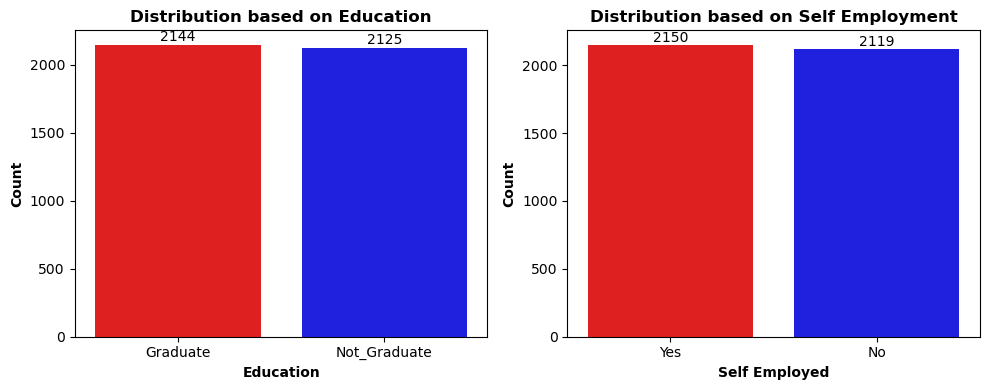

In [13]:
# Data
Graduate_count = df["education"].value_counts().iloc[0]
Not_Graduate_count = df["education"].value_counts().iloc[1]
self_employed_yes = df["self_employed"].value_counts().iloc[0]
self_employed_no = df["self_employed"].value_counts().iloc[1]

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Education distribution
sns.barplot(ax=axes[0], x=["Graduate", "Not_Graduate"], y=[Graduate_count, Not_Graduate_count], palette=["Red", "Blue"])
axes[0].set_xlabel("Education", fontsize=10, fontweight="bold")
axes[0].set_ylabel("Count", fontsize=10, fontweight="bold")
axes[0].set_title('Distribution based on Education', fontweight="bold")
for index, value in enumerate([Graduate_count, Not_Graduate_count]):
    axes[0].text(index, value + 5, str(value), ha="center", va="bottom")

# Self-employed distribution
sns.barplot(ax=axes[1], x=["Yes", "No"], y=[self_employed_yes, self_employed_no], palette=["Red", "Blue"])
axes[1].set_xlabel('Self Employed', fontsize=10, fontweight="bold")
axes[1].set_ylabel('Count', fontsize=10, fontweight="bold")
axes[1].set_title('Distribution based on Self Employment', fontweight="bold")
for index, value in enumerate([self_employed_yes, self_employed_no]):
    axes[1].text(index, value, str(value), ha="center", va="bottom")

plt.tight_layout()
plt.show();

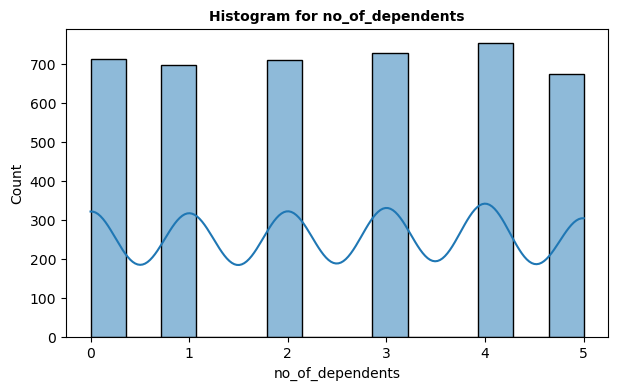

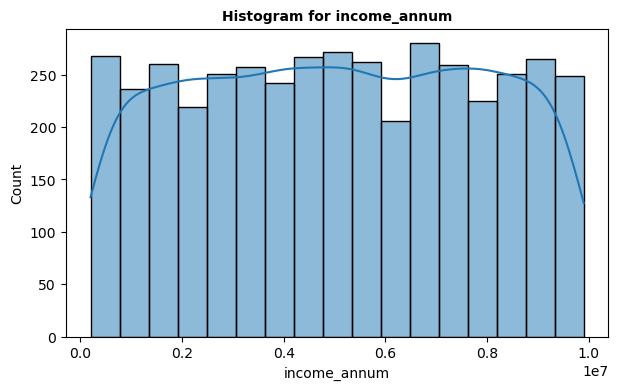

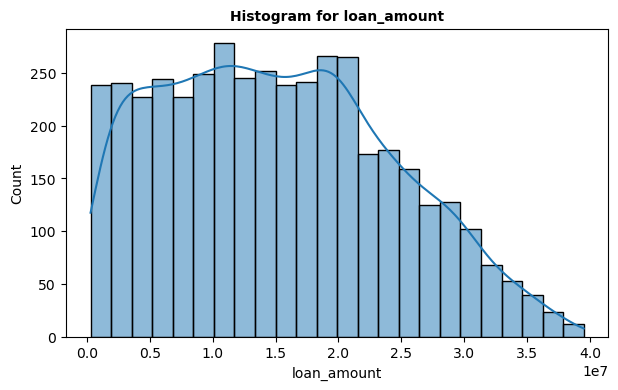

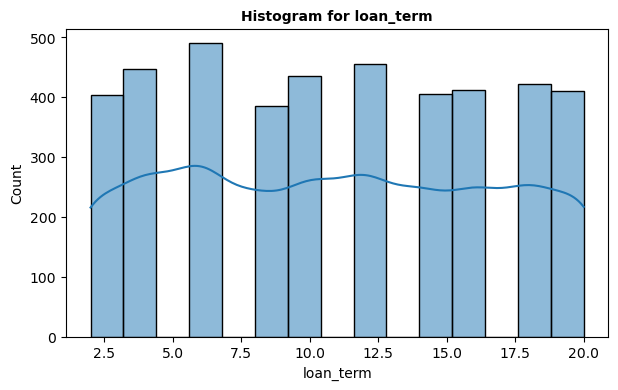

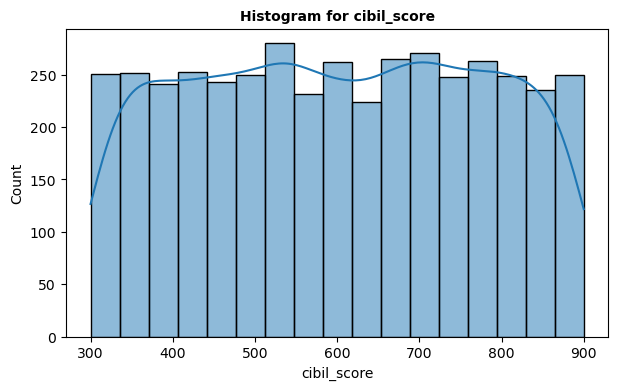

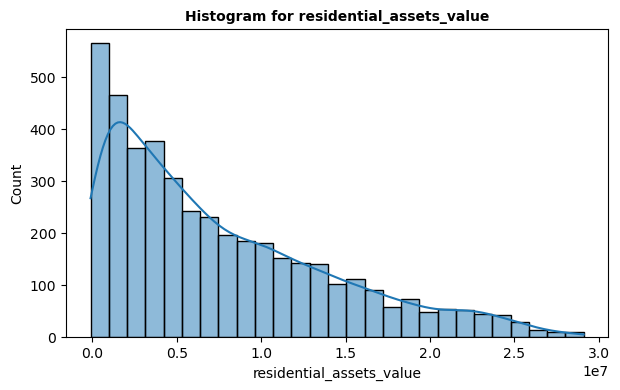

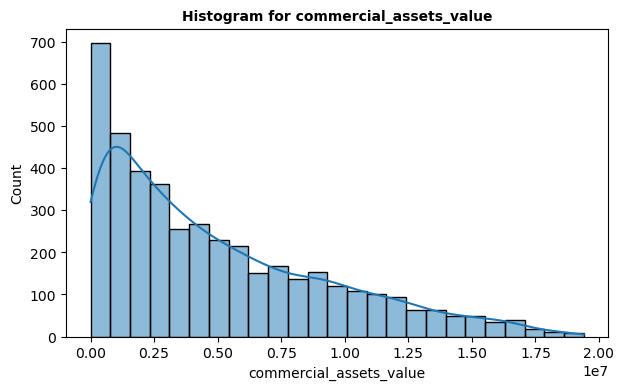

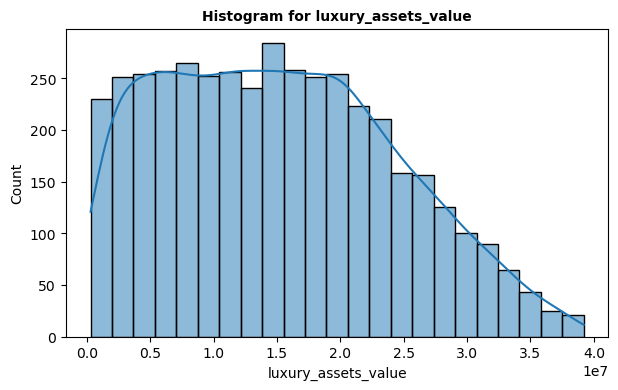

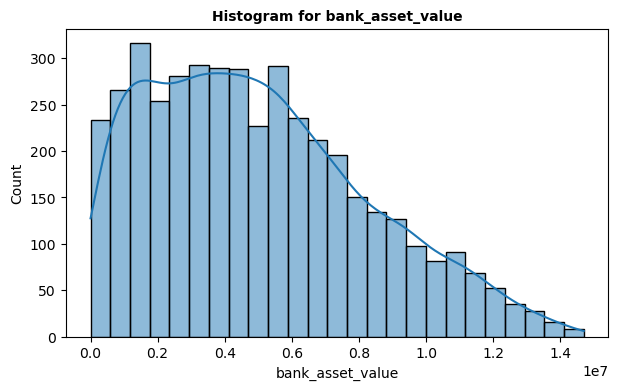

In [14]:
for i in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}', fontsize=10, fontweight='bold')
    plt.show();

In [15]:
def outlier(col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    return lower_bound, upper_bound

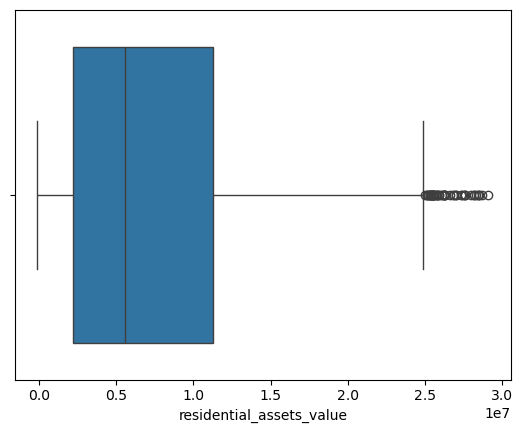

In [16]:
sns.boxplot(x=df["residential_assets_value"])
plt.show();

In [17]:
outlier("residential_assets_value")

(-11450000.0, 24950000.0)

In [18]:
df = df[df["residential_assets_value"]<=24950000.0]

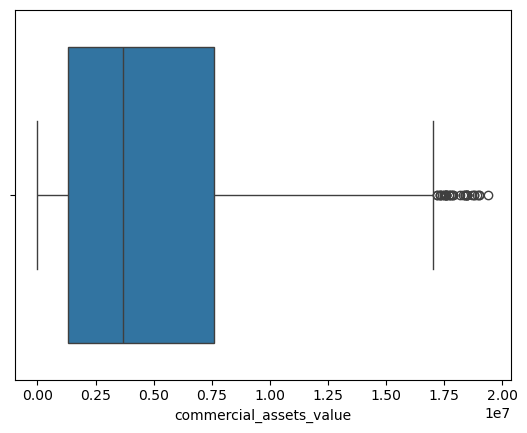

In [19]:
sns.boxplot(x=df["commercial_assets_value"])
plt.show();

In [20]:
outlier("commercial_assets_value")

(-8150000.0, 17050000.0)

In [21]:
df = df[df["commercial_assets_value"]<=17050000.0]

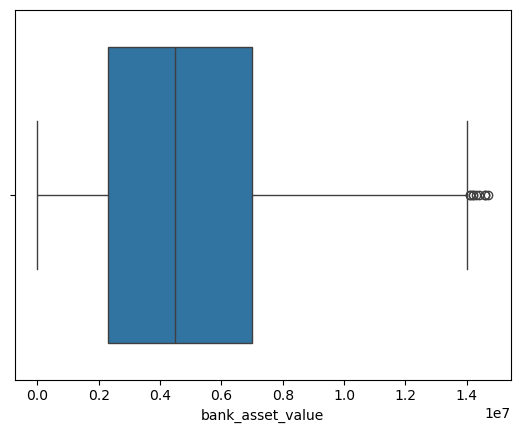

In [22]:
sns.boxplot(x=df["bank_asset_value"])
plt.show();

In [23]:
outlier("bank_asset_value")

(-4750000.0, 14050000.0)

In [24]:
df = df[df["bank_asset_value"]<=14050000.0]

In [25]:
df.shape

(4173, 12)

In [26]:
df.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [27]:
df["education"] = df["education"].map({"Not Graduate": 0, "Graduate": 1})
df["education"]

1       0
2       1
3       1
4       0
5       1
       ..
4264    1
4265    0
4266    0
4267    0
4268    1
Name: education, Length: 4173, dtype: int64

In [28]:
df["self_employed"] = df["self_employed"].map({"No": 0, "Yes": 1})
df["self_employed"]

1       1
2       0
3       0
4       1
5       1
       ..
4264    1
4265    1
4266    0
4267    0
4268    0
Name: self_employed, Length: 4173, dtype: int64

In [29]:
df["loan_status"] = df["loan_status"].map({"Rejected": 0, "Approved": 1})
df["loan_status"]

1       0
2       0
3       0
4       0
5       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4173, dtype: int64

In [30]:
df["loan_status"].value_counts()

loan_status
1    2599
0    1574
Name: count, dtype: int64

In [31]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
5,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0


In [32]:
df.columns = ['Num_dependents', 'Education', 'Self_employed', 'Annual_income', 'Loan_amount', 'Loan_term',
              'Credit_score', 'Residential_assets', 'Commercial_assets', 'Luxury_assets', 'Bank_asset', 'Loan_status']
df.head()

,Num_dependents,Education,Self_employed,Annual_income,Loan_amount,Loan_term,Credit_score,Residential_assets,Commercial_assets,Luxury_assets,Bank_asset,Loan_status
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
5,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0


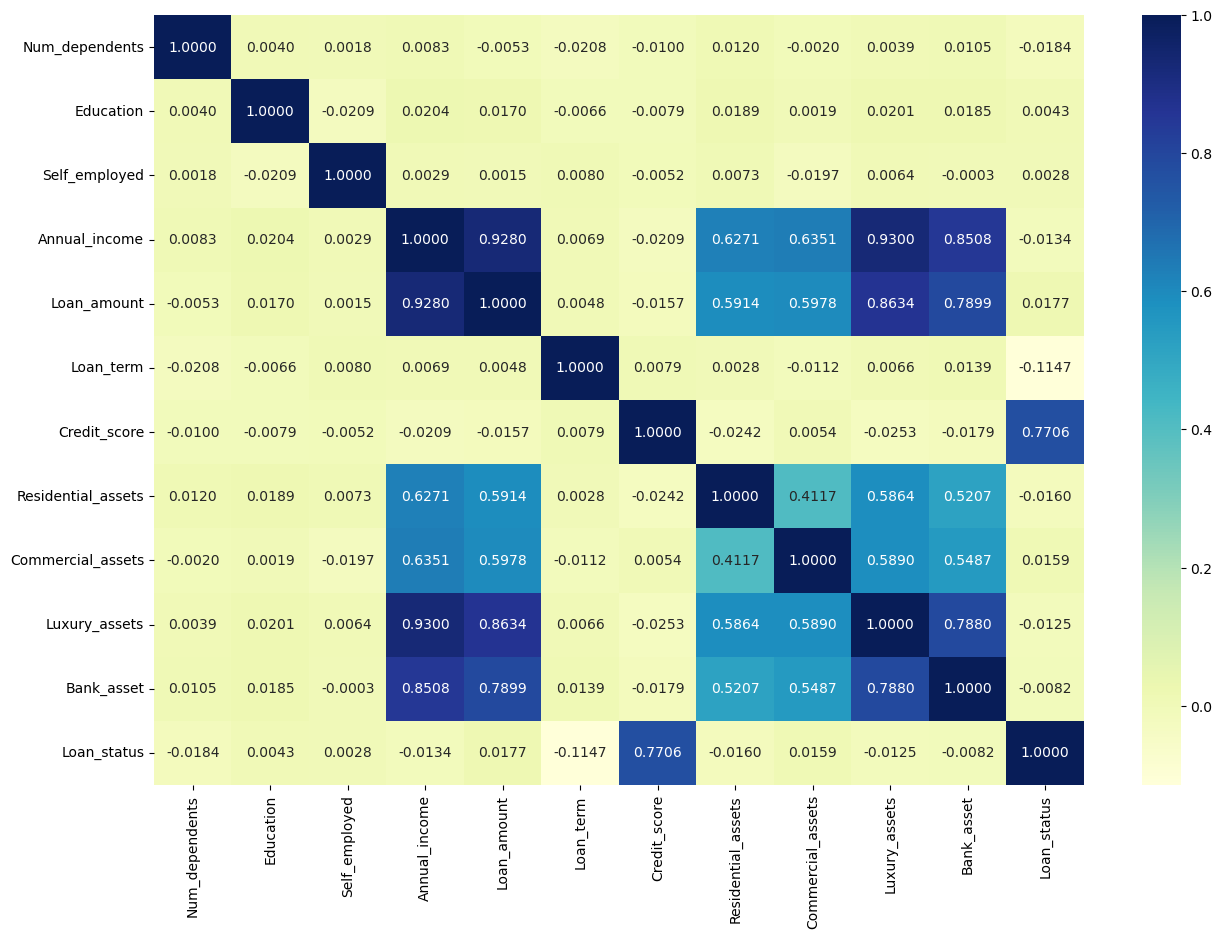

In [33]:
corr = df.corr()
plt.figure(figsize = (15, 10))
g = sns.heatmap(df.corr(), fmt=".4f", cmap="YlGnBu",annot = True)

<h2>Data Splitting</h2>

In [34]:
X = df.drop(columns=["Loan_status"])
y = df["Loan_status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

<h2>Class Balancing</h2>

In [35]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train = pd.DataFrame(y_train_resampled, columns=["Loan_status"])

X_test = pd.DataFrame(X_test, columns=X_test.columns)
X_val = pd.DataFrame(X_val, columns=X_val.columns)

y_train["Loan_status"].value_counts()

Loan_status
1    1669
0    1669
Name: count, dtype: int64

<h2>Normalization</h2>

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)        
X_val = scaler.transform(X_val)

<h2>Model Building</h2>

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold

<h3>Random Forest Classifier</h3>

In [38]:
clf_RF = RandomForestClassifier(random_state=42)

clf_RF.fit(X_train, y_train)

print("Accuracy for RF Training Set:", clf_RF.score(X_train, y_train))

Accuracy for RF Training Set: 1.0


In [39]:
y_preds = clf_RF.predict(X_test)

In [40]:
print("Accuracy for RF Test Set:", accuracy_score(y_test, y_preds))

Accuracy for RF Test Set: 0.9820359281437125


In [41]:
print("Classification Report for RF Test Set:")
print(classification_report(y_test, y_preds))

Classification Report for RF Test Set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       326
           1       1.00      0.97      0.99       509

    accuracy                           0.98       835
   macro avg       0.98      0.98      0.98       835
weighted avg       0.98      0.98      0.98       835



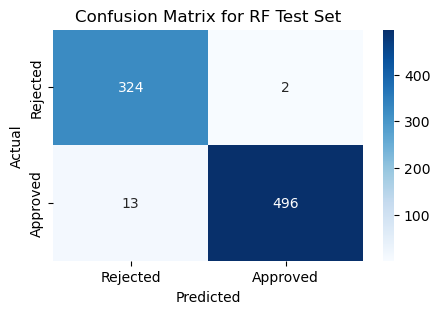

In [42]:
conf_mat = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Rejected", "Approved"], 
            yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF Test Set")
plt.show();

In [43]:
RF_params = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6, 8],
    "bootstrap": [True, False]
}

rs_RF = RandomizedSearchCV(clf_RF,
                           param_distributions=RF_params,
                           cv=5,
                           n_iter=100,
                           random_state = 42)

rs_RF.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [44]:
print("Best Hyperparameters for RF:", rs_RF.best_params_)

Best Hyperparameters for RF: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [45]:
print("Accuracy for RF Test Set Using Best Hyperparameters:", rs_RF.score(X_test, y_test))

Accuracy for RF Test Set Using Best Hyperparameters: 0.9784431137724551


In [46]:
clf_RF = RandomForestClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cross_val_results = cross_val_score(clf_RF, X_train, y_train, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.97005988 0.98203593 0.96706587 0.97904192 0.9760479  0.9760479
 0.97005988 0.9760479  0.98498498 0.99099099]
Mean Accuracy: 0.9772383161604719


In [47]:
clf_RF.fit(X_train, y_train)

test_score = clf_RF.score(X_val, y_val)
print(f'Validation Set Accuracy: {test_score}')

Validation Set Accuracy: 0.9730538922155688


In [48]:
y_val_preds = clf_RF.predict(X_val)

print("Classification Report for RF Validation Set:")
print(classification_report(y_val, y_val_preds))

Classification Report for RF Validation Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       247
           1       0.99      0.97      0.98       421

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



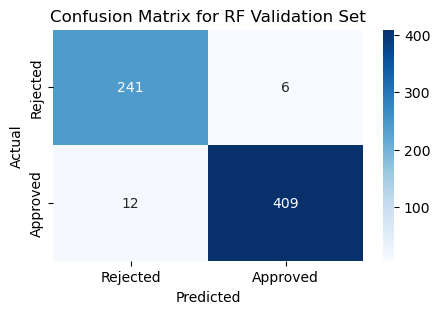

In [49]:
conf_mat = confusion_matrix(y_val, y_val_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Rejected", "Approved"], 
            yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF Validation Set")
plt.show();

<h3>Gradient Boosting Classifier (GBC)</h3>

In [50]:
clf_GBC = GradientBoostingClassifier(random_state=42)

clf_GBC.fit(X_train, y_train)

print("Accuracy for GBC Training Set:", clf_GBC.score(X_train, y_train))

Accuracy for GBC Training Set: 0.9967046135410426


In [51]:
y_preds = clf_GBC.predict(X_test)

In [52]:
print("Accuracy for GBC Test Set:", accuracy_score(y_test, y_preds))

Accuracy for GBC Test Set: 0.9760479041916168


In [53]:
print("Classification Report for GBC Test Set:")
print(classification_report(y_test, y_preds))

Classification Report for GBC Test Set:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       326
           1       0.99      0.97      0.98       509

    accuracy                           0.98       835
   macro avg       0.97      0.98      0.97       835
weighted avg       0.98      0.98      0.98       835



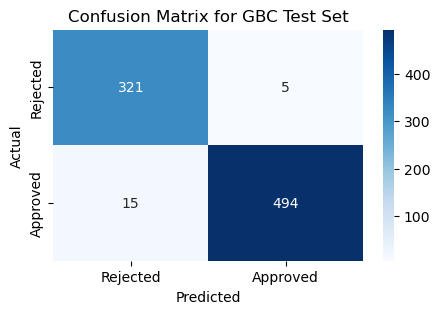

In [54]:
conf_mat = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Rejected", "Approved"], 
            yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GBC Test Set")
plt.show();

In [55]:
GBC_params = {
    "n_estimators": [100, 150, 200],
    "max_features": ["auto", "sqrt", "log2"],
    "learning_rate": uniform(0.01, 0.3),
    "max_depth": randint(3, 10),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "subsample": uniform(0.5, 1.0),
}

rs_GBC = RandomizedSearchCV(clf_GBC,
                           param_distributions=GBC_params,
                           cv=5,
                           n_iter=100,
                           random_state = 42)

rs_GBC.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020F35831590>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020F35830B10>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020F358566D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020F35857610>,
                                        'n_estimators': [100, 150, 200],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020F35857690>},
                   random_state=42)

In [56]:
print("Best Hyperparameters for GBC:", rs_GBC.best_params_)

Best Hyperparameters for GBC: {'learning_rate': 0.19349594814648427, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 11, 'n_estimators': 200, 'subsample': 0.9560699842170359}


In [57]:
print("Accuracy for GBC Test Set Using Best Hyperparameters:", rs_GBC.score(X_test, y_test))

Accuracy for GBC Test Set Using Best Hyperparameters: 0.9868263473053892


In [58]:
best_params = rs_GBC.best_params_

clf_GBC_hp = GradientBoostingClassifier(**best_params, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cross_val_results = cross_val_score(clf_GBC_hp, X_train, y_train, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.98502994 0.99401198 0.9760479  0.98802395 0.98802395 0.98502994
 0.97305389 0.98802395 0.98498498 0.99099099]
Mean Accuracy: 0.9853221484958011


In [59]:
clf_GBC_hp.fit(X_train, y_train)

test_score = clf_GBC_hp.score(X_val, y_val)
print(f'Validation Set Accuracy: {test_score}')

Validation Set Accuracy: 0.9790419161676647


In [60]:
y_val_preds = clf_GBC_hp.predict(X_val)

print("Classification Report for GBC Validation Set:")
print(classification_report(y_val, y_val_preds))

Classification Report for GBC Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       247
           1       0.98      0.99      0.98       421

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



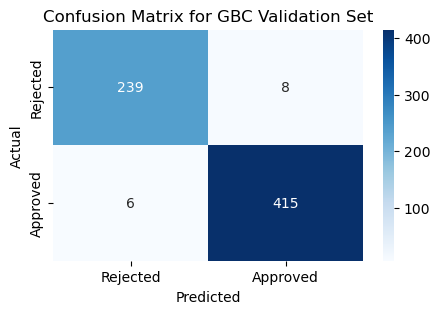

In [61]:
conf_mat = confusion_matrix(y_val, y_val_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Rejected", "Approved"], 
            yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GBC Validation Set")
plt.show();